# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [2]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :


## 4 charts
You have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : [a pie-chart ](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : [an histogram ](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html)with MAX Temperatures on X-axis.

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

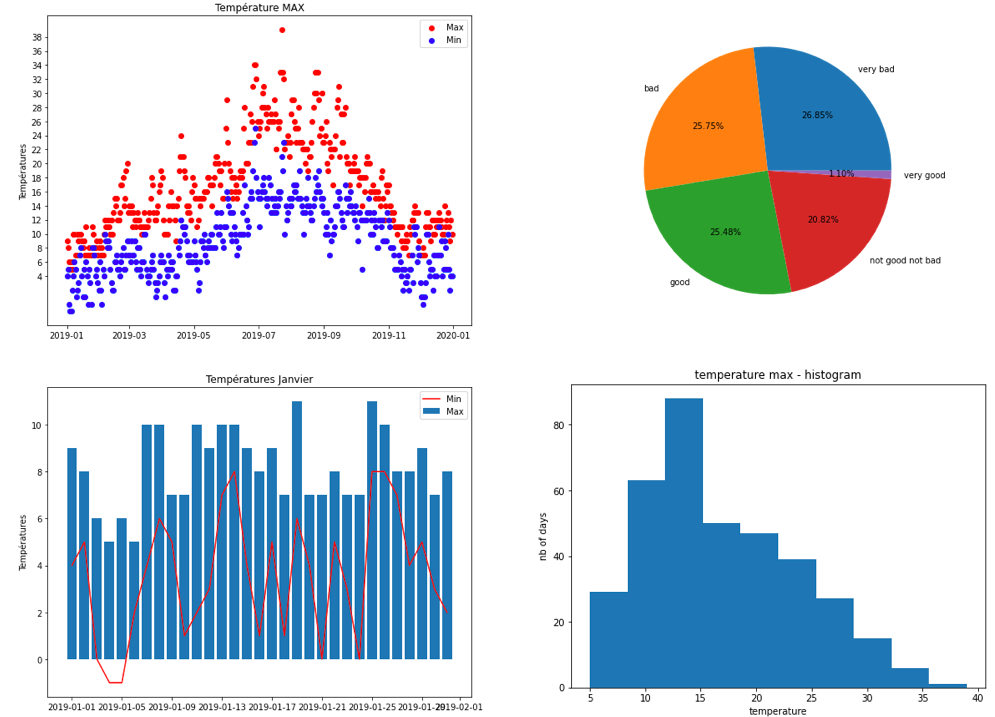

###  The figure!

<ipython-input-15-8eaf9eb420cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january.DATE = pd.to_datetime(df_january.DATE)
<ipython-input-15-8eaf9eb420cf>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(221)
<ipython-input-15-8eaf9eb420cf>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(222)
<ipython-input-15-8eaf9eb420cf>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_january.DATE.dt.strftime

Text(0.5, 0, 'Temperature (bins 5)')

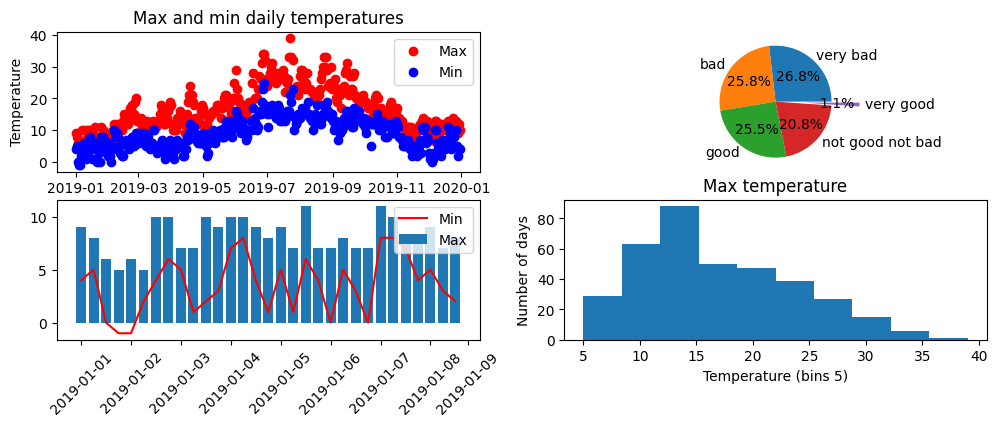

In [15]:
opinion_df = df_weather['OPINION'].value_counts()

df_january = df_weather.loc[df_weather.DATE.dt.month == 1]
df_january.DATE = pd.to_datetime(df_january.DATE)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax1 = plt.subplot(221)

ax1.scatter(x = df_weather.DATE, y = df_weather.MAX_TEMPERATURE_C, color = 'red', label='Max')
ax1.scatter(x = df_weather.DATE, y = df_weather.MIN_TEMPERATURE_C, color='blue', label='Min')
ax1.set_ylabel('Temperature')
ax1.set_title('Max and min daily temperatures')
ax1.legend(loc='upper right')

ax2 = plt.subplot(222)
ax2.pie(opinion_df, labels=opinion_df.index, autopct='%1.1f%%',
        explode=[0.5 if opinion == 'very good' else 0 for opinion in opinion_df.index])

ax2  = plt.subplot(223)

ax2.bar(df_january.DATE, df_january.MAX_TEMPERATURE_C, label='Max')
ax2.plot(df_january.DATE, df_january.MIN_TEMPERATURE_C, color='red', label='Min')
ax2.set_xticklabels(df_january.DATE.dt.strftime('%Y-%m-%d'), rotation=45)
ax2.legend(loc='upper right')

ax3 = plt.subplot(224)

plt.hist(df_weather.MAX_TEMPERATURE_C, bins=10)
ax3.set_title('Max temperature')
ax3.set_ylabel('Number of days')
ax3.set_xlabel('Temperature (bins 5)')


## Boxplots and outliers

Plot 2 [boxplots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) :
1. on the MIN temperature
2. on the MAX temperature

Are there outliers?

<Figure size 640x480 with 0 Axes>

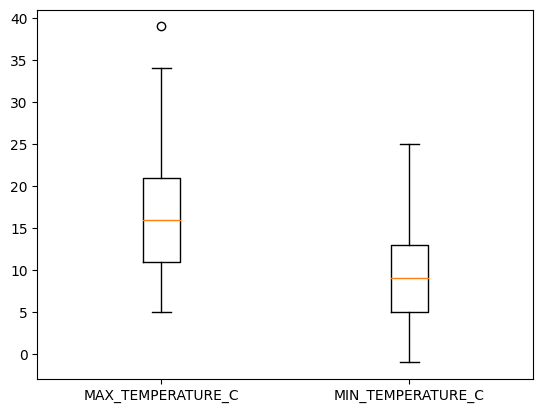

In [ ]:
fig = plt.figure()

fig, ax = plt.subplots()

temps = [df_weather.MAX_TEMPERATURE_C, df_weather.MIN_TEMPERATURE_C]

plt.boxplot(temps)

ax.set_xticks([1, 2], labels=['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C'])

There are an outliers for max temp!

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips :
- index attribute of a Series can help you to sort the date correctly
- you may need to stack several graphs based on DataFrame slices

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

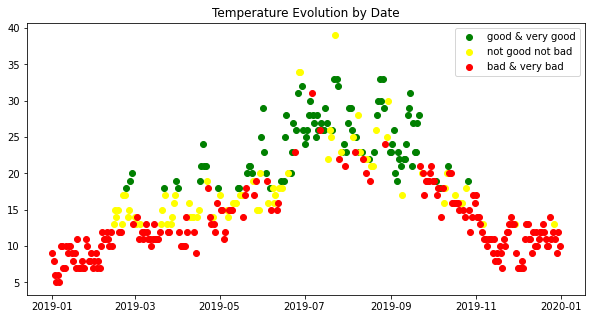

Text(0.5, 1.0, 'Temperature Evolution by Date')

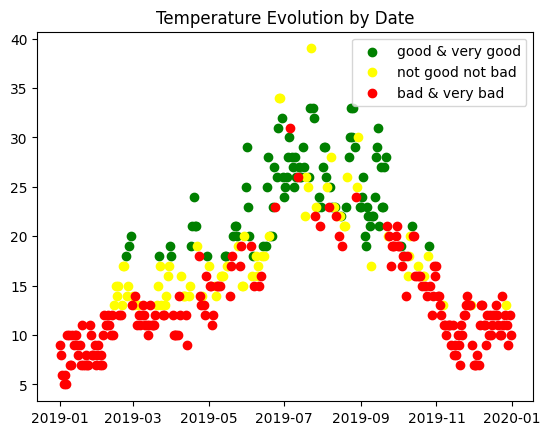

In [ ]:
def flatten_opinion(opinion):
  if opinion in ['good', 'very good']:
    return 'good & very good'
  elif opinion in ['bad', 'very bad']:
    return 'bad & very bad'
  else:
    return opinion

df_weather.OPINION = df_weather.OPINION.apply(flatten_opinion)

color_mapping = {'good & very good': 'green', 'not good not bad': 'yellow', 'bad & very bad': 'red'}

for opinion, color in color_mapping.items():
    current_df = df_weather[df_weather.OPINION == opinion]
    plt.scatter(current_df.DATE, current_df.MAX_TEMPERATURE_C, label=opinion, color=color)

plt.legend()
plt.title('Temperature Evolution by Date')
